# Corner Detection: OpenCV

Corner detection is a fundamental technique in computer vision and image processing used to identify and locate the corners or interest points in an image. Corners represent areas where the intensity or color of an image undergoes significant changes in multiple directions, making them valuable for various computer vision tasks such as image stitching, object recognition, and tracking. Several corner detection algorithms are available, with the Harris corner detector being one of the most well-known. Here's an overview of the Harris corner detection algorithm:

**Harris Corner Detector**:

The Harris corner detection algorithm operates as follows:

1. **Grayscale Conversion**:
   - The algorithm typically starts by converting the input image to grayscale to simplify processing.

2. **Image Gradient**:
   - Compute the gradient of the image to find regions with significant intensity changes. Common gradient operators include Sobel or Scharr filters.

3. **Structure Tensor**:
   - Calculate the structure tensor, which summarizes the gradient information around each pixel.
   - The structure tensor is a matrix that characterizes the local image structure. It involves computing the products of derivatives at each pixel.

4. **Corner Response Function**:
   - Compute a corner response function for each pixel using the structure tensor.
   - The corner response function measures the likelihood of a pixel being a corner based on the eigenvalues of the structure tensor.

5. **Non-Maximum Suppression**:
   - Apply non-maximum suppression to select local maxima in the corner response function as potential corner points.
   - Non-maximum suppression ensures that only distinct corners are retained.

6. **Thresholding and Corner Detection**:
   - Apply a threshold to the corner response function to filter out weak corner candidates.
   - Optionally, use other techniques like adaptive thresholding to enhance corner detection.
   - The remaining points after thresholding are considered corners.

7. **Corner Localization**:
   - Refine the corner locations by subpixel accuracy estimation to improve the accuracy of corner positions.

8. **Corner Visualization**:
   - Mark the detected corners on the original image for visualization.

OpenCV provides an implementation of the Harris corner detection algorithm, which you can use as follows in Python:

```python
import cv2
import numpy as np

# Load an image (grayscale)
image = cv2.imread('image.jpg', cv2.IMREAD_GRAYSCALE)

# Perform Harris corner detection
corners = cv2.cornerHarris(image, blockSize=2, ksize=3, k=0.04)

# Threshold and mark the corners on the original image
image[corners > 0.01 * corners.max()] = [0, 0, 255]  # Red color for corners

# Display the image with marked corners
cv2.imshow('Harris Corner Detection', image)
cv2.waitKey(0)
cv2.destroyAllWindows()
```

This code detects corners in a grayscale image using the Harris corner detection algorithm and marks the corners in red. Adjust the parameters such as `blockSize`, `ksize`, and the threshold multiplier to fine-tune the corner detection based on your specific image and requirements.

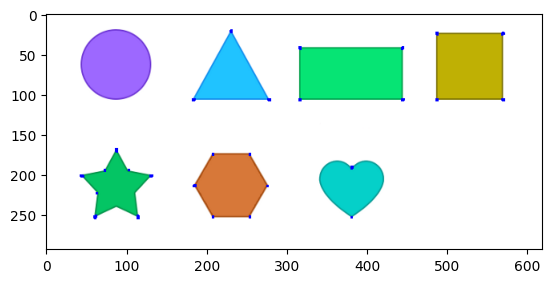

In [3]:
#Feature Detection and Description.
"""
For understanding  this we recall jisaw puzzle game where we combine multiple 
small pieces in correct order by identifying its corners , shape and pattern.

On the basis of all these we all detect corners in images with so many approaches,
"""

#Harris Corner Detection 

"""
OpenCV has the function cv2.cornerHarris() for this purpose. Its arguments are :

img - Input image, it should be grayscale and float32 type.
blockSize - It is the size of neighbourhood considered for corner detection
ksize - Aperture parameter of Sobel derivative used.
k - Harris detector free parameter in the equation.
"""
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('Images/shapes.png')

cv.imshow('img', img)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

gray = np.float32(gray)

res= cv.cornerHarris(gray, 2, 3, 0.04)

res = cv.dilate(res, None)

img[res > 0.01 * res.max()] = [0, 0, 255]  # marked color

#cv.imshow('dst', img)
plt.imshow(img)
if cv.waitKey(0) & 0xff == 27:
    cv.destroyAllWindows()



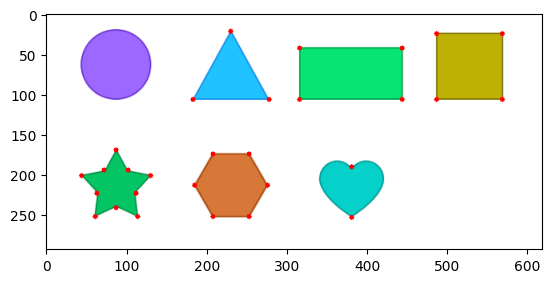

In [6]:

#We will learn about the another corner detector: Shi-Tomasi Corner Detector
#We will see the function: cv2.goodFeaturesToTrack().
#Shi- Tomasi approach is more effective as compared with Harris Corner detection

#In this we limit the number of corners and corners quality.
#It is more user friendly.

import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('Images/shapes.png')
#image must be in gary
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

#parameters (img,no.of corner,quality_level,min_distance between corner)
corners = cv2.goodFeaturesToTrack(gray,100,0.01,20)
corners = np.int64(corners)

for i in corners:
    x,y = i.ravel()
    cv2.circle(img,(x,y),3,255,-1)

#cv2.imshow("res==",img)
plt.imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()